In [1]:
import pandas as pd
import numpy as np



# Loading the data

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#  Exploratory Data Analysis (EDA)

In [3]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
print(df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [5]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
df.shape #shape of dataset



pd.set_option("display.float", "{:.2f}".format)
df.describe()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [8]:

df.target.value_counts()


1    165
0    138
Name: target, dtype: int64

In [9]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [10]:
print(" actegorical val ",categorical_val)
print("continous val ",continous_val)

 actegorical val  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
continous val  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


# Data processing

In [11]:

categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)
#dataset.head()

In [12]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.30,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.50,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.40,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.80,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.60,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [13]:
print(df.columns)

print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [14]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])


# Applying Decision tree algo

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
train_score_1={}

f1_train1={}
precision_train1={}
recall_train1={}
test_score_1={}
f1_test1={}
precision_test1={}
recall_test1={}
def print_score(algo_name,clf, X_train, y_train, X_test, y_test, train=True):
    
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        train_score_1["Training score "+algo_name]=accuracy_score(y_train, pred) * 100
        f1_train1[algo_name+" training f1 score "]=f1_score(y_train, pred) * 100
        precision_train1[algo_name+" training precision score"]=precision_score(y_train, pred) * 100
        recall_train1[algo_name+" training recall score"]= recall_score(y_train, pred) * 100
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        test_score_1["Testing score"+algo_name]=accuracy_score(y_test, pred) * 100
        f1_test1[algo_name+" testing f1 score"]=f1_score(y_test, pred) * 100
        precision_test1[algo_name+" testing precision score"]=precision_score(y_test, pred) * 100
        recall_test1[algo_name+" testing recall score"]= recall_score(y_test, pred) * 100
    #return f1_train , precision_train ,recall_train,f1_test,precision_test,recall_test

In [16]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# =======HYPERPARAMETER TUNING ON ALGOS===========

# Decision tree hyper parameter tuning

In [17]:
from sklearn. tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }


tree = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree, params, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)


#Verbose is a general programming term for produce lots of logging output.
#You can think of it as asking the program to "tell me everything about what you are doing all the time".
#Just set it to true and see what happens.

#iid : boolean, default=True

#    If True, the data is assumed to be identically distributed across the folds, and the loss minimized is the total loss per sample, and not the mean loss across the folds.



#n_jobs : int, default=1

#    Number of jobs to run in parallel.

In [18]:
#grid_search_cv.fit(X_train, y_train)

In [19]:
#grid_search_cv.best_estimator_ 

In [20]:
#grid_search_cv.best_score_
#grid_search_cv.best_params_


In [21]:

"""
best_estimator_ : estimator

    Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. Not available if refit=False.

best_score_ : float

    Score of best_estimator on the left out data.

best_params_ : dict

    Parameter setting that gave the best results on the hold out data.

scorer_ : function

    Scorer function used on the held out data to choose the best parameters for the model.")
"""

'\nbest_estimator_ : estimator\n\n    Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. Not available if refit=False.\n\nbest_score_ : float\n\n    Score of best_estimator on the left out data.\n\nbest_params_ : dict\n\n    Parameter setting that gave the best results on the hold out data.\n\nscorer_ : function\n\n    Scorer function used on the held out data to choose the best parameters for the model.")\n'

In [22]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3,
                              min_samples_leaf=2, 
                              min_samples_split=2, 
                              splitter='random')

In [23]:
tree.fit(X_train, y_train)


print_score("Decision tree",tree,X_train, y_train, X_test, y_test, train=True)
print_score("Decision tree",tree, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 85.38%
_______________________________________________
Classification Report:	Precision Score: 83.87%
			Recall Score: 90.43%
			F1 score: 87.03%
_______________________________________________
Confusion Matrix: 
 [[ 77  20]
 [ 11 104]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
Classification Report:	Precision Score: 86.00%
			Recall Score: 86.00%
			F1 score: 86.00%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 7 43]]



# logistic regression

In [24]:
from sklearn.linear_model import LogisticRegression
"""
params1 = {"solver":("newton-cg", "lbfgs", "liblinear", "sag", "saga"), 
           
          "C":(list(range(1, 100)))  ,
           "multi_class":("auto", "ovr")
          }
"""
log_reg = LogisticRegression(random_state=42,solver="liblinear")

#grid_search_cv = GridSearchCV(log_reg, params1, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)

#grid_search_cv.fit(X_train, y_train)


log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [25]:
#grid_search_cv.best_estimator_ 



In [26]:
log_reg = LogisticRegression(C=1,solver="newton-cg")
log_reg.fit(X_train,y_train)

LogisticRegression(C=1, solver='newton-cg')

In [27]:
print_score("Logistic regression",log_reg, X_train, y_train, X_test, y_test, train=True)
print_score("Logistic regression",log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.79%
_______________________________________________
Classification Report:	Precision Score: 85.95%
			Recall Score: 90.43%
			F1 score: 88.14%
_______________________________________________
Confusion Matrix: 
 [[ 80  17]
 [ 11 104]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
Classification Report:	Precision Score: 84.91%
			Recall Score: 90.00%
			F1 score: 87.38%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 5 45]]



# KNN algorithm

In [28]:
from sklearn.neighbors import KNeighborsClassifier

train_score = []
test_score = []
neighbors = range(1, 21)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))
    test_score.append(accuracy_score(y_test, model.predict(X_test)))

    
knn_classifier = KNeighborsClassifier(n_neighbors=19)
knn_classifier.fit(X_train, y_train)

print_score("KNN",knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score("KNN",knn_classifier, X_train, y_train, X_test, y_test, train=False)


Train Result:
Accuracy Score: 84.43%
_______________________________________________
Classification Report:	Precision Score: 82.54%
			Recall Score: 90.43%
			F1 score: 86.31%
_______________________________________________
Confusion Matrix: 
 [[ 75  22]
 [ 11 104]]

Test Result:
Accuracy Score: 89.01%
_______________________________________________
Classification Report:	Precision Score: 87.04%
			Recall Score: 94.00%
			F1 score: 90.38%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 3 47]]



# Random forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

"""
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rand_forest = RandomForestClassifier()

grid_search_cv2 = GridSearchCV(rand_forest, random_grid, scoring="accuracy", verbose=3, n_jobs=-1, cv=3,iid=True)

"""
"""
    n_estimators = number of trees in the foreset
    
    max_features = max number of features considered for splitting a node
    
    max_depth = max number of levels in each decision tree
    
    min_samples_split = min number of data points placed in a node before the node is split
    
    min_samples_leaf = min number of data points allowed in a leaf node
    
    bootstrap = method for sampling data points (with or without replacement)

"""

'\n    n_estimators = number of trees in the foreset\n    \n    max_features = max number of features considered for splitting a node\n    \n    max_depth = max number of levels in each decision tree\n    \n    min_samples_split = min number of data points placed in a node before the node is split\n    \n    min_samples_leaf = min number of data points allowed in a leaf node\n    \n    bootstrap = method for sampling data points (with or without replacement)\n\n'

In [30]:
#grid_search_cv2.fit(X_train, y_train)

In [31]:
#grid_search_cv2.best_params_
#rand_forest.fit(X_train, y_train)

rand_forest = RandomForestClassifier(bootstrap= True,max_depth= 10, min_samples_split= 5, n_estimators= 200)



In [32]:
rand_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=200)

In [33]:
print_score("Random forest",rand_forest, X_train, y_train, X_test, y_test, train=True)
print_score("Random forest",rand_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 97.64%
_______________________________________________
Classification Report:	Precision Score: 98.25%
			Recall Score: 97.39%
			F1 score: 97.82%
_______________________________________________
Confusion Matrix: 
 [[ 95   2]
 [  3 112]]

Test Result:
Accuracy Score: 84.62%
_______________________________________________
Classification Report:	Precision Score: 84.62%
			Recall Score: 88.00%
			F1 score: 86.27%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 6 44]]



In [34]:
#grid_search_cv2.best_estimator_ 

In [35]:
import matplotlib.pyplot as plt

# Xgboost

In [36]:
params={
    "learning_rate" :  [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [37]:
from xgboost import XGBClassifier 

In [38]:
xgboost1 = XGBClassifier()
random_search=RandomizedSearchCV(xgboost1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3,iid=True);
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.3s finished
/home/ahmad/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:847: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [39]:
random_search.best_estimator_



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
xgboost1=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4,
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


In [41]:
xgboost1.fit(X_train, y_train);

In [42]:
print_score("xgboost",xgboost1, X_train, y_train, X_test, y_test, train=True)
print_score("xgboost",xgboost1, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 91.51%
_______________________________________________
Classification Report:	Precision Score: 90.76%
			Recall Score: 93.91%
			F1 score: 92.31%
_______________________________________________
Confusion Matrix: 
 [[ 86  11]
 [  7 108]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
Classification Report:	Precision Score: 86.27%
			Recall Score: 88.00%
			F1 score: 87.13%
_______________________________________________
Confusion Matrix: 
 [[34  7]
 [ 6 44]]



# Voting classifier

In [43]:
from sklearn.ensemble import  VotingClassifier

In [44]:
voting_clif = VotingClassifier(estimators=[
    ('tree',tree),('lr',log_reg),('knn',knn_classifier),('rf',rand_forest)], 
                               voting='hard')

In [45]:
voting_clif.fit(X_train,y_train)

VotingClassifier(estimators=[('tree',
                              DecisionTreeClassifier(max_depth=3,
                                                     min_samples_leaf=2,
                                                     splitter='random')),
                             ('lr',
                              LogisticRegression(C=1, solver='newton-cg')),
                             ('knn', KNeighborsClassifier(n_neighbors=19)),
                             ('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_split=5,
                                                     n_estimators=200))])

In [46]:
for clf in (tree,log_reg,knn_classifier,rand_forest,voting_clif):
    voting_clif.fit(X_train,y_train)
    y_pred=clf.predict(X_test)

In [47]:
print_score("Voting Classifier", voting_clif,X_train, y_train, X_test, y_test, train=True)
print_score("Voting Classifier",voting_clif, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.21%
_______________________________________________
Classification Report:	Precision Score: 88.79%
			Recall Score: 89.57%
			F1 score: 89.18%
_______________________________________________
Confusion Matrix: 
 [[ 84  13]
 [ 12 103]]

Test Result:
Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 84.31%
			Recall Score: 86.00%
			F1 score: 85.15%
_______________________________________________
Confusion Matrix: 
 [[33  8]
 [ 7 43]]



# whole accuracy

below are returned scores from print_scores() fucntion

In [48]:
#test_scores=[test_score1,test_score2,test_score3,test_score4,test_score5]
algos=['Random\nforest','KNN','Decision\ntree','Logistic\nregression','xgboost','Voting\nclassifier']


algos_names=["Decision\ntree", "Logistic\nregression", "KNN", "Random\nforest","xgboost", "Voting\nClassifier"]
train_score_=list(train_score_1.values())
test_score_=list(test_score_1.values())
f1_test=list(f1_test1.values())
precision_test=list(precision_test1.values())
recall_test=list(recall_test1.values())
f1_train=list(f1_train1.values())
precision_train=list(precision_train1.values())
recall_train=list(recall_train1.values())




In [49]:
test_score5 = accuracy_score(y_test, voting_clif.predict(X_test)) *100
train_score5 = accuracy_score(y_train, voting_clif.predict(X_train)) *100

results_df = pd.DataFrame(data=[["Random forest",train_score_[3],test_score_[3],f1_test[3],f1_test[3],precision_test[3],precision_test[3],recall_test[3],recall_train[3]],
                                ["KNN",train_score_[2],test_score_[2],f1_test[2],f1_test[2],precision_test[2],precision_test[2],recall_test[2],recall_train[2]],
                                ["Decision tree",train_score_[0],train_score_[0],f1_test[0],f1_test[0],precision_test[0],precision_test[0],recall_test[0],recall_train[0]],
                                ["Logistic Regression", train_score_[1], test_score_[1],f1_test[1],f1_test[1],precision_test[1],precision_test[1],recall_test[1],recall_train[1]],
                                ["xgboost",train_score_[4],test_score_[4],f1_test[4],f1_test[4],precision_test[4],precision_test[4],recall_test[4],recall_train[4]],
                                
                                ["Voting classfier",train_score_[5],test_score_[5],f1_test[5],f1_test[5],precision_test[5],precision_test[5],recall_test[5],recall_train[5]]
                               ], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'
                                  ,'f1 test %','f1 train %','Precision test %','Precision train %','Recall test %','Recall train %'])
results_df
                                
            

,Model,Training Accuracy %,Testing Accuracy %,f1 test %,f1 train %,Precision test %,Precision train %,Recall test %,Recall train %
0,Random forest,97.64,84.62,86.27,86.27,84.62,84.62,88.00,97.39
1,KNN,84.43,89.01,90.38,90.38,87.04,87.04,94.00,90.43
2,Decision tree,85.38,85.38,86.00,86.00,86.00,86.00,86.00,90.43
3,Logistic Regression,86.79,85.71,87.38,87.38,84.91,84.91,90.00,90.43
4,xgboost,91.51,85.71,87.13,87.13,86.27,86.27,88.00,93.91
5,Voting classfier,88.21,83.52,85.15,85.15,84.31,84.31,86.00,89.57


# Training Plots

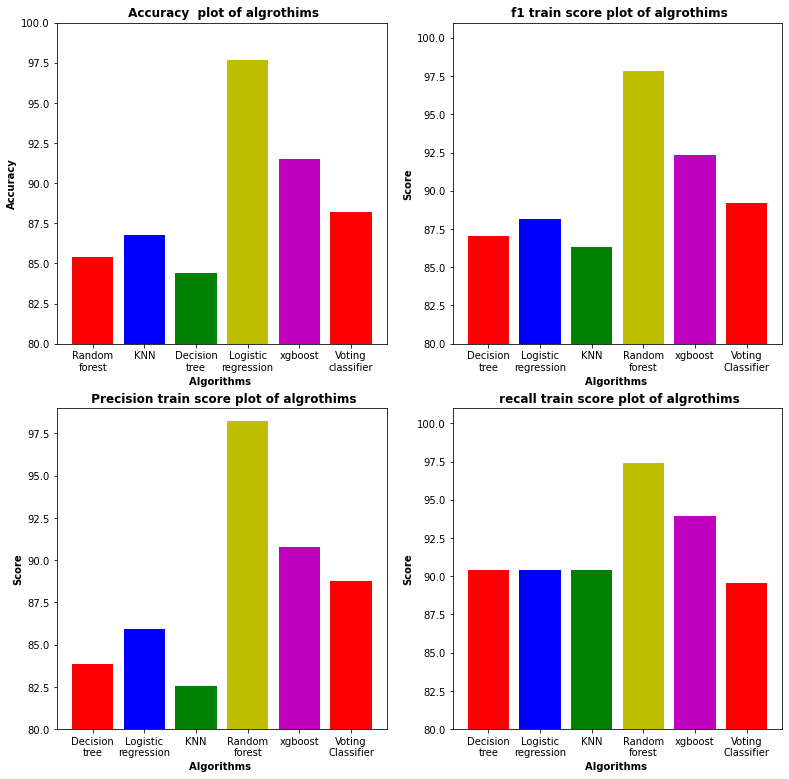

In [74]:
plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
plt.title(" Accuracy  plot of algrothims",fontweight="bold")
plt.ylim(80,100)
plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("Accuracy",fontweight="bold")
plt.bar(algos,train_score_
                 ,color=['r','b','g','y','m']);

plt.subplot(2,2,2)


plt.title(" f1 train score plot of algrothims",fontweight="bold")
plt.ylim(80,101)

plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("Score",fontweight="bold")

plt.bar(algos_names,f1_train,color=['r','b','g','y','m']);


plt.subplot(2,2,3)

plt.title(" Precision train score plot of algrothims",fontweight="bold")
plt.ylim(80,99)

plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("Score",fontweight="bold")

plt.bar(algos_names,precision_train,color=['r','b','g','y','m']);



plt.subplot(2,2,4)

plt.title(" recall train score plot of algrothims",fontweight="bold")
plt.ylim(80,101)

plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("Score",fontweight="bold")

plt.bar(algos_names,recall_train,color=['r','b','g','y','m']);


# Test plots

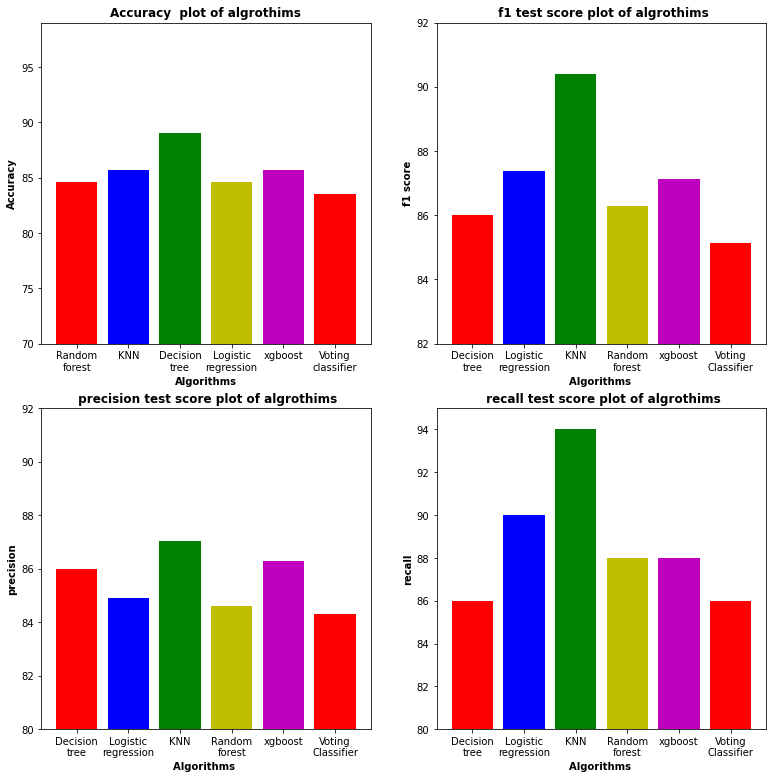

In [73]:

plt.figure(figsize=(13,13))
plt.subplot(2,2,1)
plt.title("Accuracy  plot of algrothims",fontweight="bold")
plt.ylim(70,99)

plt.xlabel("Algorithms",fontweight="bold")
plt.ylabel("Accuracy",fontweight="bold")

plt.bar(algos,test_score_,color=['r','b','g','y','m']);



plt.subplot(2,2,2)
plt.title(" f1 test score plot of algrothims",fontweight="bold")
plt.ylim(82,92)

plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("f1 score",fontweight="bold")

plt.bar(algos_names,f1_test,color=['r','b','g','y','m']);



plt.subplot(2,2,3)
plt.title(" precision test score plot of algrothims",fontweight="bold")
plt.ylim(80,92)

plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("precision",fontweight="bold")

plt.bar(algos_names,precision_test,color=['r','b','g','y','m']);


plt.subplot(2,2,4)
plt.title(" recall test score plot of algrothims",fontweight="bold")
plt.ylim(80,95)

plt.xlabel("Algorithms ",fontweight="bold")
plt.ylabel("recall",fontweight="bold")

plt.bar(algos_names,recall_test,color=['r','b','g','y','m']);